# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.shape

(404290, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


C:\Users\deepa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_duplicate', ylabel='count'>

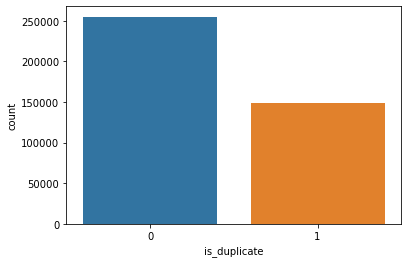

In [7]:
# df.groupby('is_duplicate')['id'].count().plot.bar()
sns.countplot('is_duplicate',data=df)

In [8]:
len(df)

404290

In [9]:
len(df[df['is_duplicate']==0])/len(df)*100

63.08021469737069

In [10]:
len(df[df['is_duplicate']==1])/len(df)*100

36.9197853026293

**Number of unique questions**

Making a Series of questions from question 1 and question 2

In [11]:
qids=pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print(qids[:10])
print(len(qids)/2)
print(type(qids))

0     1
1     3
2     5
3     7
4     9
5    11
6    13
7    15
8    17
9    19
dtype: int64
404290.0
<class 'pandas.core.series.Series'>


In [12]:
# unique_qs stores the total number of unique questions
unique_qs=len(np.unique(qids))
print(unique_qs)
np.unique(qids)[-20:]

537933


array([537914, 537915, 537916, 537917, 537918, 537919, 537920, 537921,
       537922, 537923, 537924, 537925, 537926, 537927, 537928, 537929,
       537930, 537931, 537932, 537933], dtype=int64)

In [13]:
qs_morethan1time=np.sum(qids.value_counts()>1)
qs_morethan1time

111780

In [14]:
qids.value_counts()

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
75109       1
81254       1
85352       1
83305       1
168274      1
Length: 537933, dtype: int64

In [15]:
df['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [16]:
q_vals=qids.value_counts()
print(type(q_vals))
q_vals

<class 'pandas.core.series.Series'>


2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
75109       1
81254       1
85352       1
83305       1
168274      1
Length: 537933, dtype: int64

In [17]:
q_vals=q_vals.values
q_vals

array([157, 120, 111, ...,   1,   1,   1], dtype=int64)

C:\Users\deepa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Plot representing unique and repeating questions'}>

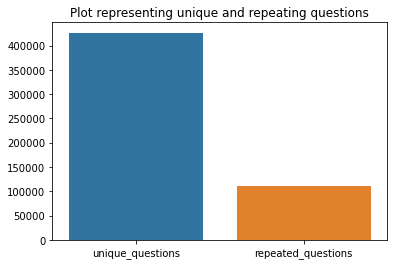

In [18]:
x=['unique_questions','repeated_questions']
y=[unique_qs-qs_morethan1time,qs_morethan1time]
plt.title('Plot representing unique and repeating questions')
sns.barplot(x,y)

In [19]:
pair_duplicates=df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2','is_duplicate'],axis=0)
pair_duplicates.size()

qid1    qid2    is_duplicate
1       2       0               1
3       4       0               1
        282170  0               1
        380197  0               1
        488853  0               1
                               ..
537924  537925  0               1
537926  537927  1               1
537928  537929  0               1
537930  537931  0               1
537932  537933  0               1
Length: 404290, dtype: int64

**No. of occurrences of each question**

<ipython-input-20-cb0d61b8e2c4>:3: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log',nonposy='clip')


Text(0, 0.5, 'Number of questions')

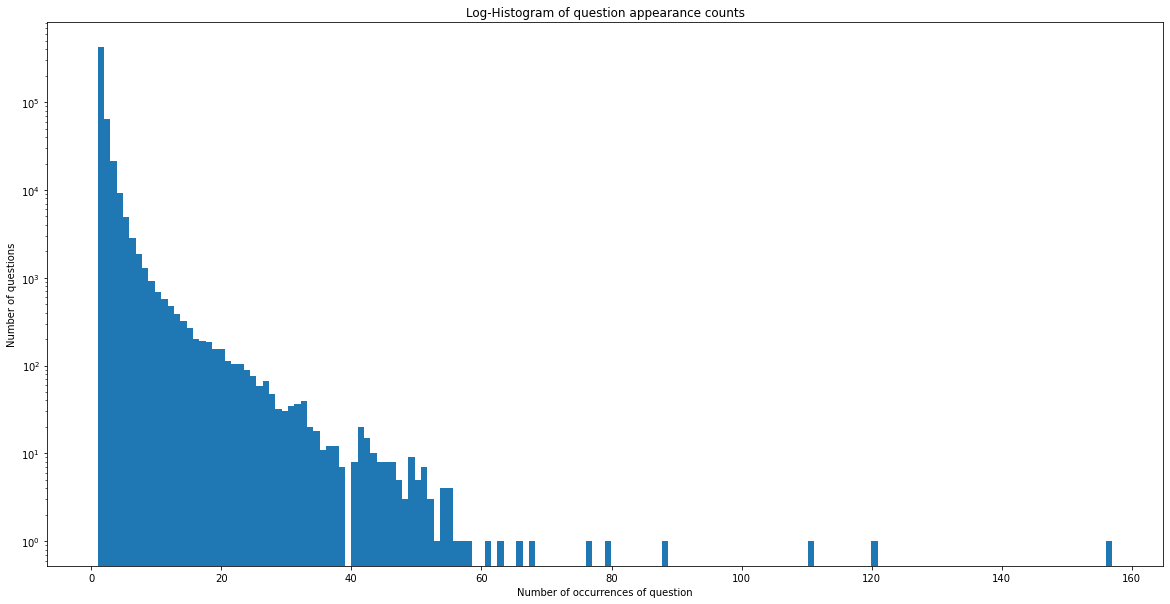

In [20]:
plt.figure(figsize=(20,10))
plt.hist(qids.value_counts(),bins=160)
plt.yscale('log',nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurrences of question')
plt.ylabel('Number of questions')

In [21]:
nan_rows=df[df.isnull().any(1)]
print(nan_rows)

            id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                question2  is_duplicate  
105780                                                NaN             0  
201841                                                NaN             0  
363362  My Chinese name is Haichao Yu. What English na...             0  


In [22]:
df=df.fillna('')
nan_rows=df[df.isnull().any(1)]
print(nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


# **Basic Feature Extraction**

**freq_qid1** = Frequency of qid1's

**freq_qid2** = Frequency of qid2's

**q1len** = Length of q1

**q2len** = Length of q2

**q1_n_words** = Number of words in question 1

**q2_n_words** = Number of words in question 2

**word_Common** = Number of common unique words in question 1 and question 2

**word_Total** = Total number of words in question 1 + Total number of words in question 2

**word_Share** = (word common)/(word total)

**freq_q1+q2** = Sum of frequency of qid1 and qid2

**freq_q1-q2** = Difference of frequency of qid1 and qid2

In [23]:
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
    df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
    df['q1len'] = df['question1'].str.len() 
    df['q2len'] = df['question2'].str.len()
    df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
    df['word_Common'] = df.apply(normalized_word_Common, axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    df['word_Total'] = df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    df['word_Share'] = df.apply(normalized_word_share, axis=1)

    df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
    df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

    df.to_csv("df_fe_without_preprocessing_train.csv", index=False)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_Share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [24]:
df

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_Share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,2,2,85,79,14,13,11.0,25.0,0.440000,4,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1,12,1,41,42,8,9,5.0,16.0,0.312500,13,11
404287,404287,537928,537929,What is one coin?,What's this coin?,0,1,1,17,17,4,3,1.0,7.0,0.142857,2,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,1,1,94,127,17,25,1.0,40.0,0.025000,2,0


# Analysis of some of the extracted features

Here are some questions that have only one single words

In [25]:
print("Minimum length of the questions in question1 : ",min(df['q1_n_words']))
print("Minimum length of the questions in question2 : ",min(df['q2_n_words']))

print("Number of questions with minimum length [question1] : ",df[df['q1_n_words']==1].shape[0])
print("Number of questions with minimum length [question2] : ",df[df['q2_n_words']==1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of questions with minimum length [question1] :  67
Number of questions with minimum length [question2] :  24


C:\Users\deepa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\deepa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_Share', ylabel='Density'>

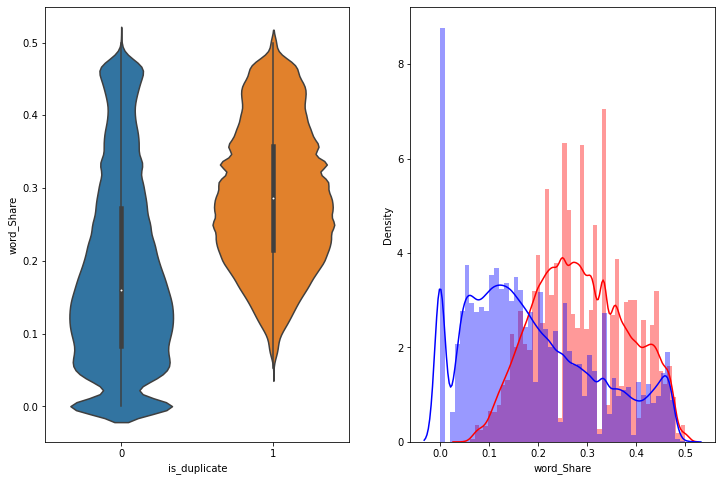

In [26]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate',y='word_Share',data=df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate']==1.0]['word_Share'][0:], label='1',color='red')
sns.distplot(df[df['is_duplicate']==0.0]['word_Share'][0:], label='0',color='blue')

The average word share and common number of words are more when the question1 and question 2 are similar(duplicate)

C:\Users\deepa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\deepa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_Common', ylabel='Density'>

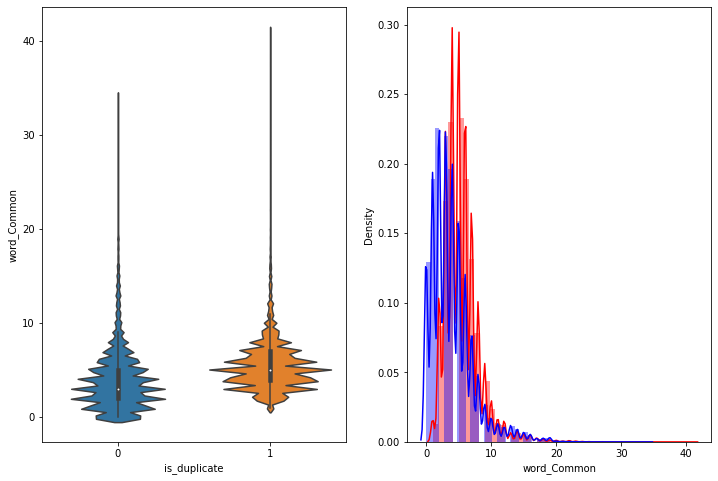

In [27]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate',y='word_Common',data=df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate']==1.0]['word_Common'][0:], label='1',color='red')
sns.distplot(df[df['is_duplicate']==0.0]['word_Common'][0:], label='0',color='blue')

The distributions of the owrd_Common feature in similar and non_similar questions are highly overlapping

# **Advanced Feature Extraction**

In [28]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc
from array import array
import re
from nltk.corpus import stopwords
# import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this
# import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

# Preprocessing of Text

Preprocessing
* Removing HTML Tags
* Removing Punctuations
* Performing Stemming
* Removing Stopwords
* Expanding contractions etc.

In [29]:
# To get the results in 4 decimal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    porter=PorterStemmer()
    pattern=re.compile('\W')
    
    if type(x)==type(''):
        x=re.sub(pattern,' ',x)
        x=porter.stem(x)
        example1=BeautifulSoup(x)
        x=example1.get_text()
        
    return x    

Definition:
- __Token__: You get a token by splitting sentence with a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word
<br>
<br>

Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>
- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>      
- __last_word_eq__ :  Check if Last word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>
- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>       
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>
- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>


- __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>
- __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>
- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>
- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [30]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string
def lcsubstrings(seq1, seq2, positions=False):
    L1, L2 = len(seq1), len(seq2)
    ms = []
    mlen = last = 0
    if L1 < L2:
        seq1, seq2 = seq2, seq1
        L1, L2 = L2, L1

    column = array('L', range(L2))

    for i in range(L1):
        for j in range(L2):
            old = column[j]
            if seq1[i] == seq2[j]:
                if i == 0 or j == 0:
                    column[j] = 1
                else:
                    column[j] = last + 1
                if column[j] > mlen:
                    mlen = column[j]
                    ms = [(i, j)]
                elif column[j] == mlen:
                    ms.append((i, j))
            else:
                column[j] = 0
            last = old
    if positions:
        return (mlen, tuple((i - mlen + 1, j - mlen + 1) for i, j in ms if ms))
    return set(seq1[i - mlen + 1:i + 1] for i, _ in ms if ms)


def get_longest_substr_ratio(a, b):
    strs = list(lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    
    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [31]:
if os.path.isfile('dfwithpreprocessing.csv'):
    df=pd.read_csv('dfwithpreprocessing.csv',encoding='latin-1')
    df.fillna('')
else:    
    df=extract_features(df)
    df.to_csv('dfwithpreprocessing.csv', index=False) 

In [32]:
df.shape[1]

32

In [33]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total', 'word_Share', 'freq_q1+q2', 'freq_q1-q2',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

In [34]:
  df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,1,51,88,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


# Analysis of Extracted Features

**Creating word cloud of duplicate and non duplicate words**

In [35]:
df_duplicate=df[df['is_duplicate']==1]
df_nonduplicate=df[df['is_duplicate']==0]

In [36]:
p=np.dstack([df_duplicate['question1'],df_duplicate['question2']]).flatten()
n=np.dstack([df_nonduplicate['question1'],df_nonduplicate['question2']]).flatten()

In [37]:
p.shape

(298526,)

In [38]:
p[0]

'astrology  i am a capricorn sun cap moon and cap rising   what does that say about me '

In [39]:
print('No. of data points in class(duplicate):', len(p))
print('No. of data points in class(non-duplicate):', len(n))

No. of data points in class(duplicate): 298526
No. of data points in class(non-duplicate): 510054


In [40]:
np.savetxt('train_p.txt',p,delimiter=' ',fmt='%s',encoding='utf-8')
np.savetxt('train_n.txt',n,delimiter=' ',fmt='%s',encoding='utf-8')

In [41]:
textp_w = open('train_p.txt','r',encoding='utf-8').read()
textn_w = open('train_n.txt','r',encoding='utf-8').read()   
type(textp_w)

str

In [42]:
stopwords=set(STOPWORDS)
stopwords.add('said')
stopwords.add('br')
stopwords.add(' ')
stopwords.remove('not')
stopwords.remove('no')
stopwords.remove('like')
print('Total number of words in duplicate pair questions : ',len(textp_w))
print('Total number of words in duplicate pair questions : ',len(textn_w))

Total number of words in duplicate pair questions :  16110763
Total number of words in duplicate pair questions :  33201102


Word Cloud for Duplicate Questions Pairs


(-0.5, 399.5, 199.5, -0.5)

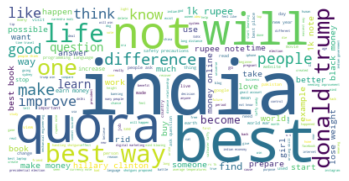

In [43]:
wc=WordCloud(background_color='white',max_words=len(textp_w),stopwords=stopwords)
wc.generate(textp_w)
print("Word Cloud for Duplicate Questions Pairs")
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')

Word Cloud for Non-Duplicate Questions Pairs


(-0.5, 399.5, 199.5, -0.5)

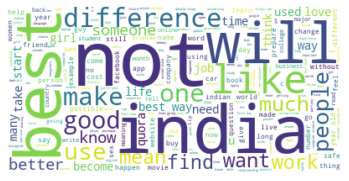

In [44]:
wc=WordCloud(background_color='white',max_words=len(textn_w),stopwords=stopwords)
wc.generate(textn_w)
print("Word Cloud for Non-Duplicate Questions Pairs")
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')

In [45]:
n=df.shape[0]
n

404290

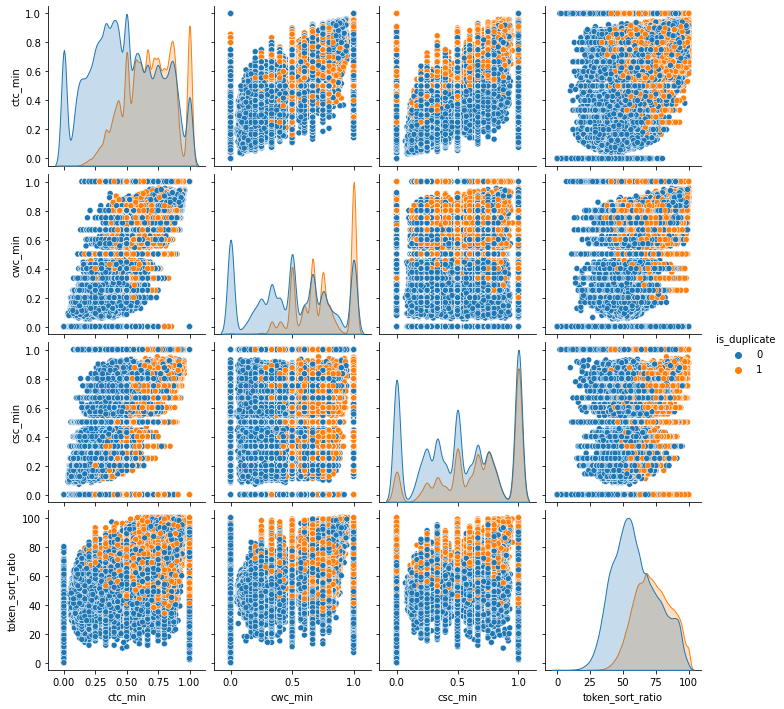

In [46]:
sns.pairplot(df[['ctc_min','cwc_min','csc_min','token_sort_ratio','is_duplicate']],hue='is_duplicate',vars=['ctc_min','cwc_min','csc_min','token_sort_ratio'])

<AxesSubplot:xlabel='token_sort_ratio', ylabel='Density'>

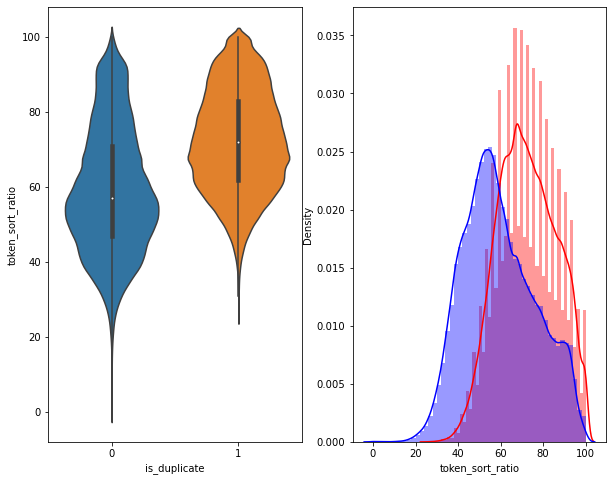

In [47]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate',y='token_sort_ratio',data=df)

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate']==1.0]['token_sort_ratio'],label='1',color='red')
sns.distplot(df[df['is_duplicate']==0.0]['token_sort_ratio'],label='0',color='blue')

<AxesSubplot:xlabel='fuzz_ratio', ylabel='Density'>

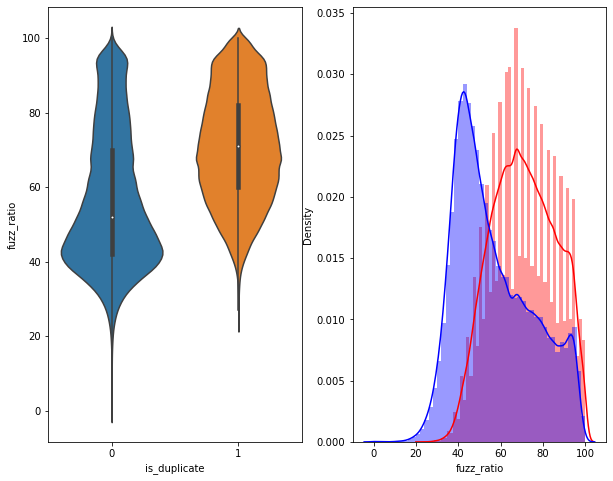

In [48]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate',y='fuzz_ratio',data=df)

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate']==1.0]['fuzz_ratio'],label='1',color='red')
sns.distplot(df[df['is_duplicate']==0.0]['fuzz_ratio'],label='0',color='blue')

## Visualization

In [49]:
# Using T-SNE for Dimentionality reduction for 15 features (generated after cleaning the data) to 2 dimension

from sklearn.preprocessing import MinMaxScaler

dfp_subsampled=df[0:5000]
X=MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y=dfp_subsampled['is_duplicate']

In [50]:
tsne2d=TSNE(
    n_components=2,
    init='random',
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.018s...
[t-SNE] Computed neighbors for 5000 samples in 0.415s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.116557
[t-SNE] Computed conditional probabilities in 0.224s
[t-SNE] Iteration 50: error = 80.9733734, gradient norm = 0.0451379 (50 iterations in 1.438s)
[t-SNE] Iteration 100: error = 70.4407959, gradient norm = 0.0098959 (50 iterations in 1.253s)
[t-SNE] Iteration 150: error = 68.6497803, gradient norm = 0.0059423 (50 iterations in 1.350s)
[t-SNE] Iteration 200: error = 67.8067017, gradient norm = 0.0040715 (50 iterations in 1.341s)
[t-SNE] Iteration 250: error = 67.3086243, gradient norm = 0.0031636

In [51]:
tsne2d

array([[-23.209225 , -50.464333 ],
       [-15.73111  , -13.3986435],
       [ -4.2854753,  15.736924 ],
       ...,
       [ 36.28136  ,  35.17678  ],
       [ 23.545202 ,   5.9528913],
       [ 47.92591  , -20.768414 ]], dtype=float32)

In [52]:
l=np.array([[2,3],[4,5]])
l[:,0]

array([2, 4])

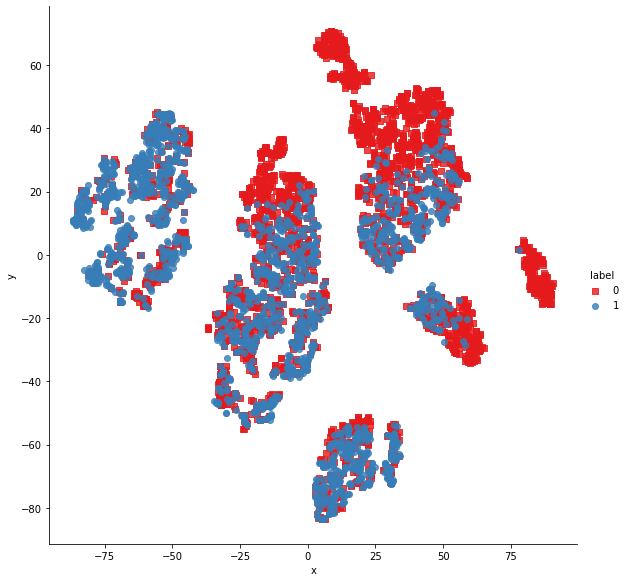

In [53]:
df2=pd.DataFrame({'x':tsne2d[:,0],'y':tsne2d[:,1],'label':y})
# Draw the plot in appropriate place in the grid
sns.lmplot(data=df2,x='x',y='y',hue='label',fit_reg=False,size=8,palette='Set1',markers=['s','o'])
# plt.title('perplexity : {} and max_iter : {}',format('30','1000'))

In [54]:
df

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,1,51,88,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,1,1,73,59,...,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,1,1,50,65,...,0.000000,0.0,0.0,2.0,12.0,36,36,35,40,0.039216
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,3,1,76,39,...,0.307690,0.0,1.0,6.0,10.0,67,47,46,56,0.175000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0,2,2,85,79,...,0.785709,1.0,1.0,1.0,13.5,97,88,91,87,0.387500
404286,404286,18840,155606,do you believe there is life after death,is it true that there is life after death,1,12,1,41,42,...,0.555549,1.0,0.0,1.0,8.5,79,69,72,73,0.642857
404287,404287,537928,537929,what is one coin,what is this coin,0,1,1,17,17,...,0.749981,1.0,1.0,0.0,4.0,86,79,79,76,0.444444
404288,404288,537930,537931,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0,1,1,94,127,...,0.040000,0.0,0.0,8.0,21.0,48,48,42,46,0.052632


In [55]:
tsne3d=TSNE(
    n_components=3,
    init='random',
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.027s...
[t-SNE] Computed neighbors for 5000 samples in 0.434s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.116557
[t-SNE] Computed conditional probabilities in 0.220s
[t-SNE] Iteration 50: error = 80.3930130, gradient norm = 0.0316218 (50 iterations in 2.945s)
[t-SNE] Iteration 100: error = 69.1391754, gradient norm = 0.0033516 (50 iterations in 2.226s)
[t-SNE] Iteration 150: error = 67.6481857, gradient norm = 0.0017935 (50 iterations in 1.957s)
[t-SNE] Iteration 200: error = 67.0898132, gradient norm = 0.0012118 (50 iterations in 2.000s)
[t-SNE] Iteration 250: error = 66.7632446, gradient norm = 0.0008854

In [56]:
trace1=go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        colorscale='Portland',
        colorbar=dict(title='duplicate'),
        line=dict(color='rgb(220,225,225)'),
        opacity=0.75
    )
)

In [57]:
data=[trace1]
layout=dict(height=800,width=800,title='3d embedding with engineered features')
fig=dict(data=data,layout=layout)
py.iplot(fig,filename='3DBubble')